In [2]:
import os
os.chdir('/Users/w21013885/2025_RP_phases/phonons')
from ase.spacegroup.symmetrize import FixSymmetry

In [3]:
import numpy as np
from ase.io import read
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from matplotlib import pyplot as plt
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path

/Users/w21013885/anaconda3/envs/nep/lib/python3.11/site-packages/ase/spacegroup/symmetrize.py:45: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  std_cell = dataset['std_lattice']
/Users/w21013885/anaconda3/envs/nep/lib/python3.11/site-packages/phonopy/structure/symmetry.py:328: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  "rotations": self._dataset["rotations"],


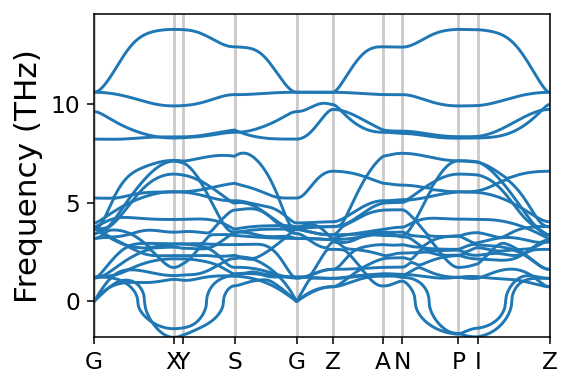

In [18]:
structure = read('RP_1_000_000_primitive.in')
calculator = CPUNEP('../nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)
phonon = get_force_constants(structure, calculator, [4,4,2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
a = structure.cell[:][0][0]
c = structure.cell[:][2][2]
eta = (1 + a**2/c**2)/4
xi = a**2/(2*c**2)
path = "GXYSGZANPIZ"
special_points = dict(
    G = [0,0,0],
    X = [0,0,0.5],
    Y = [-xi, -xi, 0.5],
    S = [-eta, eta, eta],
    Z = [1/2, 1/2, -1/2],
    A = [eta, 1-eta, -eta],
    N = [0, 1/2, 0],
    P = [1/4, 1/4, 1/4],
    I = [1/2, 1/2, -xi], 

)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
fig.savefig('test.png', bbox_inches='tight')

/Users/w21013885/anaconda3/envs/nep/lib/python3.11/site-packages/ase/spacegroup/symmetrize.py:45: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  std_cell = dataset['std_lattice']
/Users/w21013885/anaconda3/envs/nep/lib/python3.11/site-packages/phonopy/structure/symmetry.py:328: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  "rotations": self._dataset["rotations"],


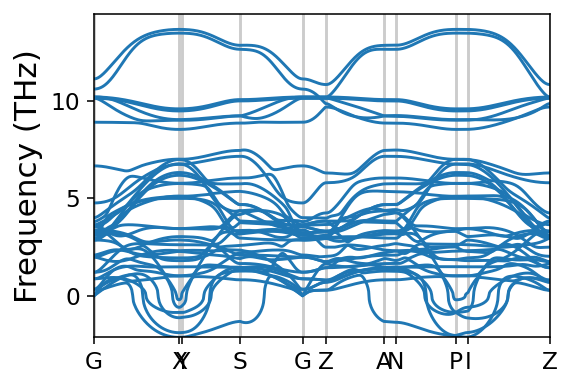

In [21]:
structure = read('RP_2_000_000_primitive.in')
calculator = CPUNEP('../nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)
phonon = get_force_constants(structure, calculator, [4,4,2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
a = structure.cell[:][0][0]
c = structure.cell[:][2][2]
eta = (1 + a**2/c**2)/4
xi = a**2/(2*c**2)
path = "GXYSGZANPIZ"
special_points = dict(
    G = [0,0,0],
    X = [0,0,0.5],
    Y = [-xi, -xi, 0.5],
    S = [-eta, eta, eta],
    Z = [1/2, 1/2, -1/2],
    A = [eta, 1-eta, -eta],
    N = [0, 1/2, 0],
    P = [1/4, 1/4, 1/4],
    I = [1/2, 1/2, -xi], 

)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
fig.savefig('test.png', bbox_inches='tight')